In [1]:

import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform
from scipy import signal
from scipy import ndimage

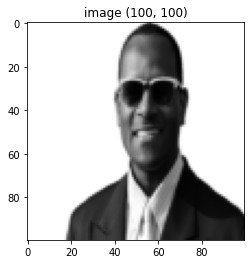

In [2]:
# Read image
img = io.imread("imgs/man.jpg")
img = np.sum(img, axis=2)
img = img / np.max(img)

img = transform.resize(img, (100, 100))

# noise = np.random.normal(0.01, 0.01, img.shape)
# img = img + noise

plt.figure()
plt.title(f"image {img.shape}")
plt.imshow(img, cmap='gray')


### Edge detection by kernel filtering

For given kernels $K_x$ and $K_y$
trying to aproximate the gradient to extract edges.

$I$ the image.

$ G_x = I * K_x \quad  G_y = I * K_y $

$\nabla{I(x,y)} = \begin{pmatrix} G_x \\ G_y \end{pmatrix} \quad$
$|| \nabla{I(x,y)} || = \sqrt{ G_x^2 + G_y^2 }$


**Difference filter:**

$ K_x = \begin{bmatrix} +1 & 0 \\ -1 & 0 \end{bmatrix} \quad$
$ K_y = \begin{bmatrix} +1 & -1 \\ 0 & 0 \end{bmatrix}$

**Roberts filtering:**

$ K_x = \begin{bmatrix} +1 & 0 \\ 0 & -1 \end{bmatrix}  \quad$
$ K_y = \begin{bmatrix} 0 & +1 \\ -1 & 0 \end{bmatrix}$

**Prewitt filtering:**

$ K_x = \begin{bmatrix} -1 & 0 & +1 \\ -1 & 0 & +1 \\ -1 & 0 & +1 \end{bmatrix}  \quad$
$ K_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$

**Sobel filtering:**

$ K_x = \begin{bmatrix} +1 & 0 & -1 \\ -2 & 0 & -2 \\ +1 & 0 & -1 \end{bmatrix}  \quad$
$ K_y = \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$


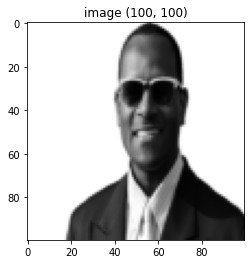

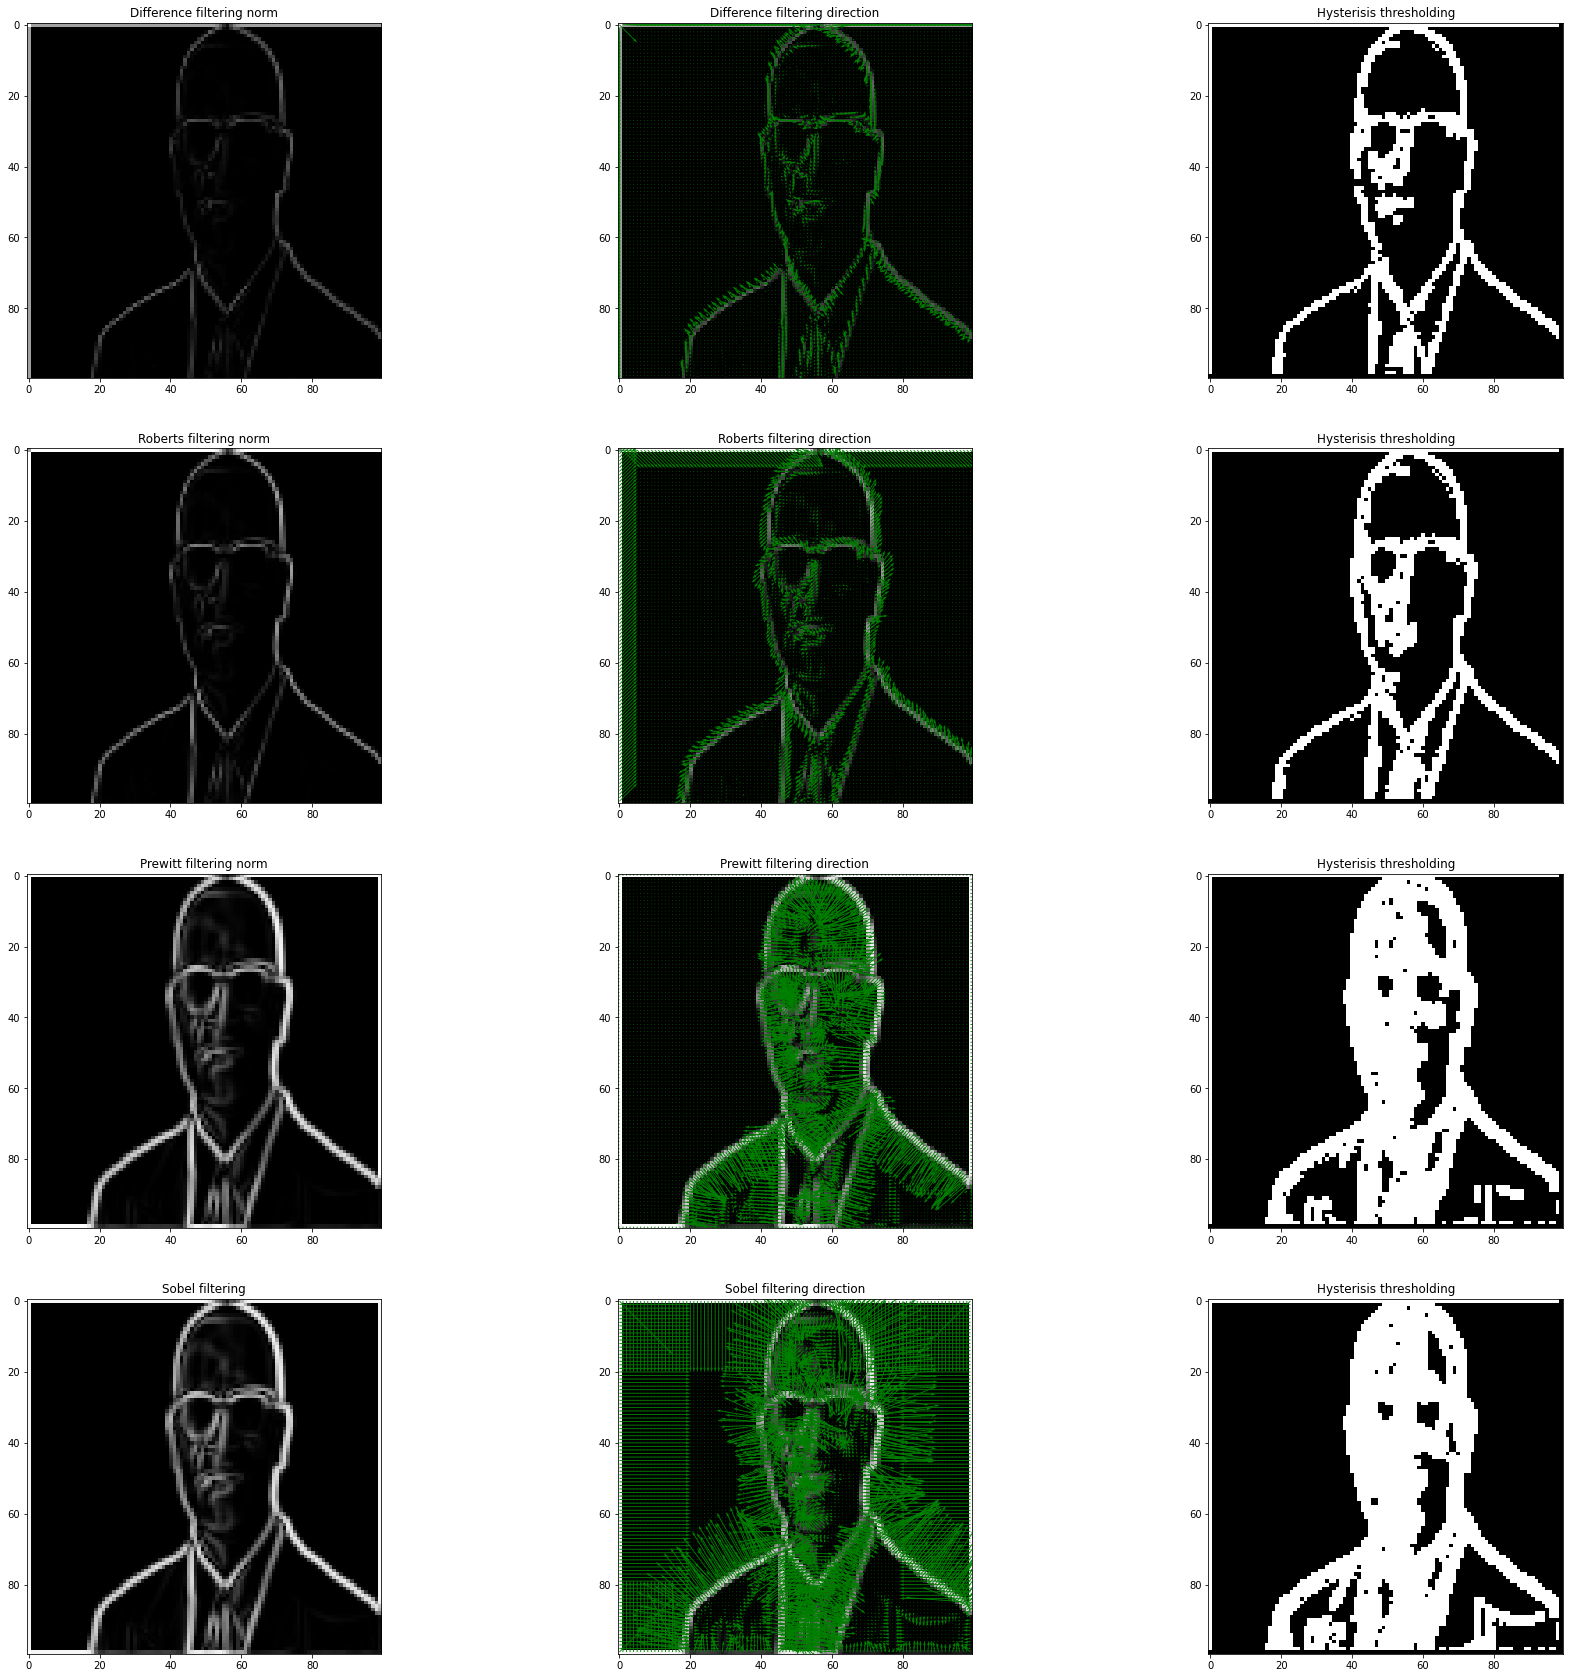

In [3]:
H = img.shape[0]
W = img.shape[1]

def hysterisis_thresholding(img, low, high):
  # We identify the value >= high
  # and the values in ]high,low[
  ids = (img>=high)*0.5 + (img>=low)*0.5
  res = np.zeros(img.shape)
  for l in range(0, img.shape[0]-1):
    for c in range(0, img.shape[1]-1):
      # For each pixel
      if ids[l,c]==1:
        # if the pixel is >= high, the it passes
        res[l,c] = 1
      if ids[l,c]==0.5:
        # if the pixel is in ]high,low[
        # the pixel pass if it's connected to a pixel that is >= high
        is_connected_to_high = False
        for i in range(-1,2,1):
          for j in range(-1,2,1):
            if ids[l+i,c+j]==1:
              is_connected_to_high = True
        if is_connected_to_high:
          res[l,c] = 1
  return res
        

# Difference filtering
kernel_diff_x = np.array([[1, 0], [-1, 0]])
kernel_diff_y = np.array([[1, -1], [0, 0]])
img_filter_diffx = signal.convolve2d(img, kernel_diff_x, mode='same')
img_filter_diffy = signal.convolve2d(img, kernel_diff_y, mode='same')
img_filter_diff = img_filter_diffx**2 + img_filter_diffy**2
# Hysterisis thresholding
img_filter_diff_hysthres = hysterisis_thresholding(img_filter_diff, 0.004, 0.05)

# Roberts filtering
kernel_roberts_x = np.array([[1, 0], [0,-1]])
kernel_roberts_y = np.array([[0, 1], [-1,0]])
img_filter_robertsx = signal.convolve2d(img, kernel_roberts_x, mode='same')
img_filter_robertsy = signal.convolve2d(img, kernel_roberts_y, mode='same')
img_filter_roberts = img_filter_robertsx**2 + img_filter_robertsy**2
# Hysterisis thresholding
img_filter_roberts_hysthres = hysterisis_thresholding(img_filter_roberts, 0.004, 0.05)

# Prewitt filtering
kernel_prewitt_x = np.array([
  [-1,  0,  1],
  [-1,  0,  1],
  [-1,  0,  1]
])
kernel_prewitt_y = np.array([
  [-1,  -1, -1],
  [0,   0,  0],
  [1,   1,  1]
])
img_filter_prewittx = signal.convolve2d(img, kernel_prewitt_x, mode='same')
img_filter_prewitty = signal.convolve2d(img, kernel_prewitt_y, mode='same')
img_filter_prewitt = img_filter_prewittx**2 + img_filter_prewitty**2
# Hysterisis thresholding
img_filter_prewitt_hysthres = hysterisis_thresholding(img_filter_prewitt, 0.004, 0.05)

# Sobel filtering
kernel_sobel_x = np.array([
  [1,  0,  -1],
  [2,  0,  -2],
  [1,  0,  -1]
])
kernel_sobel_y = np.array([
  [1,   2,  1],
  [0,   0,  0],
  [-1,  -2, -1]
])
img_filter_sobelx = signal.convolve2d(img, kernel_sobel_x, mode='same')
img_filter_sobely = signal.convolve2d(img, kernel_sobel_y, mode='same')
img_filter_sobel = img_filter_sobelx**2 + img_filter_sobely**2
# Hysterisis thresholding
img_filter_sobel_hysthres = hysterisis_thresholding(img_filter_sobel, 0.004, 0.05)

plt.figure()
plt.title(f"image {img.shape}")
plt.imshow(img, cmap='gray')

fig, axisarray = plt.subplots(4, 3, figsize=(30,30))

gridY,gridX = np.mgrid[0:H,0:W]

# Difference
axisarray[0,0].set_title('Difference filtering norm')
axisarray[0,0].imshow(np.log(img_filter_diff+1), cmap='gray')
# Difference dir
axisarray[0,1].set_title('Difference filtering direction')
axisarray[0,1].imshow(np.log(img_filter_diff+1), cmap='gray')
axisarray[0,1].quiver(
  gridX, gridY,
  img_filter_diffx*5, img_filter_diffy*5, color='g',
  angles='xy', scale_units='xy', scale=1, width=0.0025, headwidth=3)
# Hysterisis thresholding
axisarray[0,2].set_title('Hysterisis thresholding')
axisarray[0,2].imshow(img_filter_diff_hysthres, cmap='gray')

# Roberts
axisarray[1,0].set_title('Roberts filtering norm')
axisarray[1,0].imshow(np.log(img_filter_roberts+1), cmap='gray')
# Roberts dir
axisarray[1,1].set_title('Roberts filtering direction')
axisarray[1,1].imshow(np.log(img_filter_roberts+1), cmap='gray')
axisarray[1,1].quiver(
  gridX, gridY,
  img_filter_robertsx*5, img_filter_robertsy*5, color='g',
  angles='xy', scale_units='xy', scale=1, width=0.0025, headwidth=3)
# Hysterisis thresholding
axisarray[1,2].set_title('Hysterisis thresholding')
axisarray[1,2].imshow(img_filter_roberts_hysthres, cmap='gray')

# Prewitt
axisarray[2,0].set_title('Prewitt filtering norm')
axisarray[2,0].imshow(np.log(img_filter_prewitt+1), cmap='gray')
# Prewitt dir
axisarray[2,1].set_title('Prewitt filtering direction')
axisarray[2,1].imshow(np.log(img_filter_prewitt+1), cmap='gray')
axisarray[2,1].quiver(
  gridX, gridY,
  img_filter_prewittx*5, img_filter_prewitty*5, color='g',
  angles='xy', scale_units='xy', scale=1, width=0.0025, headwidth=3)
# Hysterisis thresholding
axisarray[2,2].set_title('Hysterisis thresholding')
axisarray[2,2].imshow(img_filter_prewitt_hysthres, cmap='gray')

# Sobel
axisarray[3,0].set_title('Sobel filtering')
axisarray[3,0].imshow(np.log(img_filter_sobel+1), cmap='gray')
# Sobel dir
axisarray[3,1].set_title('Sobel filtering direction')
axisarray[3,1].imshow(np.log(img_filter_sobel+1), cmap='gray')
axisarray[3,1].quiver(
  gridX, gridY,
  img_filter_sobelx*5, img_filter_sobely*5, color='g',
  angles='xy', scale_units='xy', scale=1, width=0.0025, headwidth=3)
# Hysterisis thresholding
axisarray[3,2].set_title('Hysterisis thresholding')
axisarray[3,2].imshow(img_filter_sobel_hysthres, cmap='gray')


### Gradient maximum in the direction of the gradient

For each pixel, we look in both ways of the gradient direction (one or more steps in both directions). If the considered pixel has the maximum value of the gradient in that direction, then it's considered to be an edge pixel.

It's similar to do a very local gradient ascent from the pixel but taking only the pixels that ar local maxima of the gradient.

Step by step :

**1-** Compute the gradient (using Sobel, Prewitt or another filter). Get the **gradient direction** (as normalized vector field) and the **gradient norm**.

**2-** Visit each pixel that has a non zero (or not close to zero) gradient's norm and look in the direction of the gradient (with a certain number of step).

**NB**: We know that in somewhat uniform areas, the gradient's norm is close to zero. For pixels with gradient's norm close to zero, the step in the direction stays on the same pixel and so the pixel itself is the maximum since it's the only one. So to avoid detecting edges in uniform areas we don't consider pixels with gradient's norm close to zero.

**4-** Since the point in the gradient direction are not necessarely on the grid, just use a **bilinear interpolatio** To get a correct interpolated value of the gradient.

**5-** For each pixel with a gradient norm value higher to those in the gradient direction, we have an edge pixel.


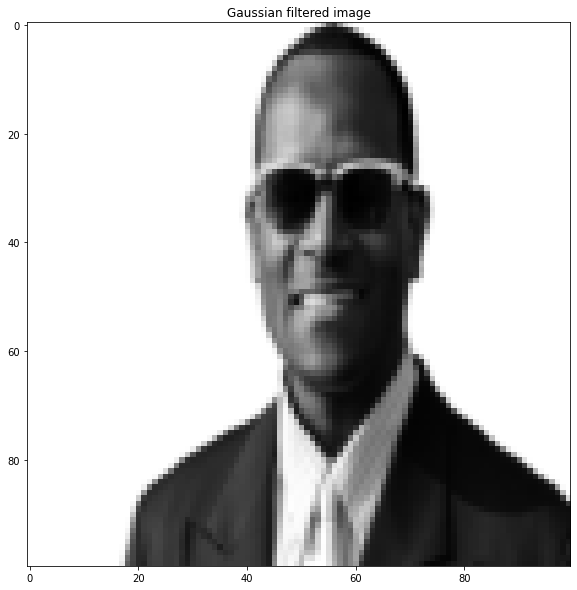

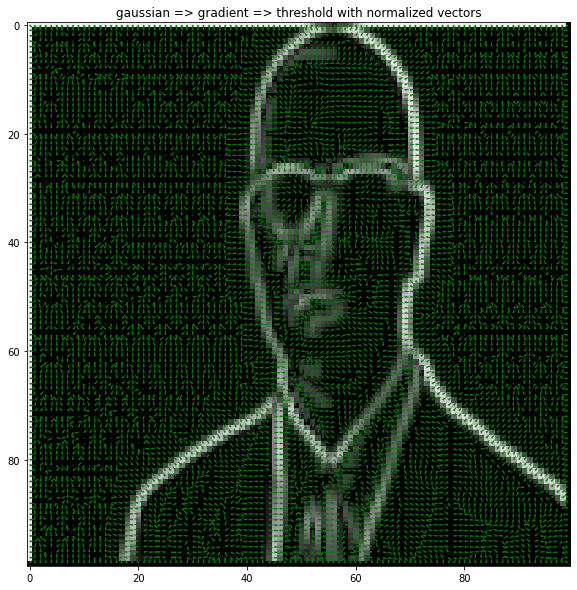

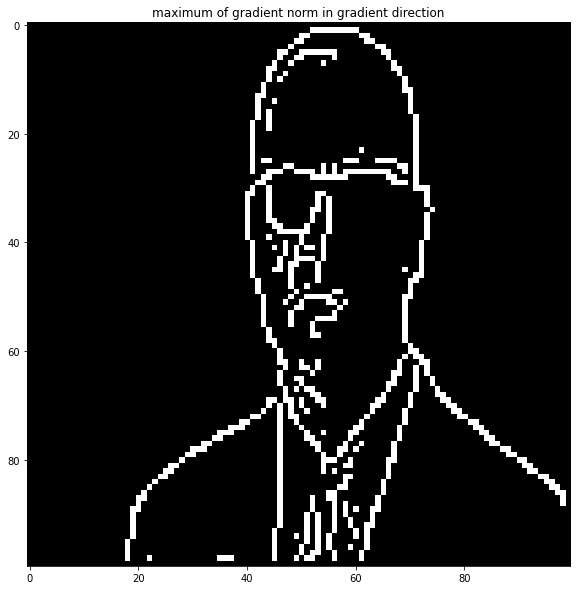

In [4]:
H = img.shape[0]
W = img.shape[1]
# Approximate gradient with Sobel filter
img_gaussian = ndimage.gaussian_filter(img, sigma=0.1)
img_gradient_x = signal.convolve2d(img_gaussian, kernel_sobel_x, mode='same')
img_gradient_y = signal.convolve2d(img_gaussian, kernel_sobel_y, mode='same')
# Gradient norm
img_gradient_norm = np.sqrt(img_gradient_x**2+img_gradient_y**2)
# Gradient direction (a normalized vector)
img_gradient_x = img_gradient_x / (img_gradient_norm+1.0e-25)
img_gradient_y = img_gradient_y / (img_gradient_norm+1.0e-25)
# Histerisis thresholding
img_gradient_norm = img_gradient_norm * hysterisis_thresholding(img_gradient_norm, 0.2, 1)

plt.figure(figsize=(10,10))
plt.title(f"Gaussian filtered image")
plt.imshow(img_gaussian, cmap='gray')

fig, axi = plt.subplots(1,1, figsize=(10,10))
axi.set_title('gaussian => gradient => threshold with normalized vectors')
axi.imshow(img_gradient_norm, cmap='gray')
gridY,gridX = np.mgrid[0:H,0:W]
axi.quiver(gridX, gridY, img_gradient_x, img_gradient_y, color='g',
  angles='xy', scale_units='xy', scale=1, width=0.0025, headwidth=2)
plt.show()

def bilin_interpolation(img, x, y):
  x0 = int(np.floor(x))
  x1 = int(np.ceil(x))
  y0 = int(np.floor(y))
  y1 = int(np.ceil(y))
  if y0<img.shape[0] and y1<img.shape[0] and x0<img.shape[1] and x1<img.shape[1]:
    a00 = img[y0, x0]
    a10 = img[y0, x1]-img[y0, x0]
    a01 = img[y1, x0]-img[y0, x0]
    a11 = img[y1, x1]-img[y0, x1]-img[y1, x0]+img[y0, x0]
    return a00 + a10*(x-x0) + a01*(y-y0) + a11*(x-x0)*(y-y0)
  else:
    return None

def getGradMaxInGradDir(gradNorm, x, y, gradx, grady, window):
  maxGrad = -1
  for step in range(-window, window+1, 1):
    g = bilin_interpolation(gradNorm, x+gradx*float(step), y+grady*float(step))
    if g!=None and g > maxGrad:
      maxGrad = g
  if maxGrad==-1:
    return None
  return maxGrad

edges = np.zeros(img_gaussian.shape)
Window = 1
for y in range(1,H-1):
    for x in range(1,W-1):
      if img_gradient_norm[y,x]>1e-5:
        max_in_grad_dir = getGradMaxInGradDir(
          img_gradient_norm, x, y, img_gradient_x[y,x], img_gradient_y[y,x],
          Window
        )

        if max_in_grad_dir!=None:
          if img_gradient_norm[y,x]==max_in_grad_dir:
            # If the gradient norm in (x,y) is greater than 
            # the gradients in both directions (positive and negative) of the gradient
            # Then we are on an edge
            edges[y,x] = 1
          else:
            edges[y,x] = 0

plt.figure(figsize=(10,10))
plt.title('maximum of gradient norm in gradient direction')
plt.imshow(edges, cmap='gray')


# Canny optimal edge detection

### Canny criteria for optimal edge detection

To ensure an optimal edge detection on an image $I$, with a filter $f$, $f$ must match the following properties:

(We are in one dimension)

Filtered image:
$ O(x_0) = \int_{-\infty}^{+\infty} I(x) f(x_0-x) dx $

* **Good detection** : Maximization of E the signal to noise ratio.
$$ 
E =
\frac
  { \int_{0}^{+\infty} f(x)dx }
  { \sqrt{\int_{-\infty}^{+\infty} f^2(x)dx} }
$$

* **Good localization** : Maximization of the inverse of the variance of the position of maximum of signal
$$
A = 
\frac
  {|f'(0)|}
  { \sqrt{\int_{-\infty}^{+\infty} f'^2(x)dx} }
$$

* **Unique response** : $X_{max}$ the mean distance between the local maxima must be as follow
$$
X_{max} = 
2\pi
\frac
  { \sqrt{\int_{-\infty}^{+\infty} f'^2(x)dx} }
  { \sqrt{\int_{-\infty}^{+\infty} f''^2(x)dx} }
$$


### RIF filter

We can approximate the Canny's criteria by maximizing $EA$ with a fixed $x_{max}$.
We can maximize *EA* by applying the Euler-Lagrange equation (it's used for differential equations).
We find : 
$$ 
\boxed{
f(x) = 
  a_1 e^{\frac{x}{\sigma}}sin(\omega x) +
  a_2 e^{\frac{x}{\sigma}}cos(\omega x) +
  a_3 e^{\frac{-x}{\sigma}}sin(\omega x) +
  a_4 e^{\frac{-x}{\sigma}}cos(\omega x)
}
$$

The **RIF filter** over $[-M,M]$ is found for 
$$
f(0) = 0, \quad
f(M) = 0, \quad
f'(0) = S, \quad and \quad
f'(M) = 0
$$

We have :
$ EA = 1.12 $

### Approximation by gaussian derivative

We can approximate the previous expression by:
$$ \boxed{
  f(x) = -x . e^{ - \frac{x^2}{2\sigma^2} }
} $$

We have :
$ EA = 0.92 $

### Shen-Castan filter

We maximize $A$ :
$$ \boxed{
  f(x) = c sign(x) e^{ - \alpha |x| }
} $$

### Deriche filter

We maximize $E$ and $A$ :
$$ \boxed{
  f(x) = -c e^{ - \alpha |x| } sin(\omega x)
} $$

We have:

$ A = \sqrt{2 \alpha} \quad $ and
$ \quad  E = \sqrt{ \frac{ 2 \alpha }{ \alpha^2 + \omega^2 } } $

We have as optimal paramaters :

* $ \quad \omega \approx 0$

and we get : $ \quad EA = 2 \quad and \quad sin(\omega x) \approx \omega x$

and $ f(x) = -c x e^{ - \alpha |x| } $

* $ \quad c = \alpha^2 $

### Discrete recursive implementation of Deriche filter

Let $h(x)$ the filter.

$$ h(x) = cx e^{-\alpha |x|} $$

The Z transform of $h(x)$ is :

$$ H(z) = \sum_{n=-\infty}^{+\infty} h[n]z^{-n} $$

We decompose $h[n]$ as the sum for positive and negative values of n:

$$ h[n] = h_-[n] + h_+[n] $$

We can then compute each component's Z transform. We get two second order recursive stable filters:

$$ H_-(z) = \frac{ ce^{-\alpha}z^{-1} }{ 1 -2e^{-\alpha}z^{-1} + e^{-2\alpha}z^{-2}} $$

$$ H_+(z) = \frac{ -ce^{-\alpha}z }{ 1 -2e^{-\alpha}z + e^{-2\alpha}z^{-2}} $$

And we can express the filter recursively to get each sample $B[n]$ of the filtering of the $A[n]$ samples signal :

$$ \boxed{
  \begin{align*}
    & B[0] = 1 \\
    & c = -\frac{ (1-e^{-\alpha})^2 }{ e^{-\alpha} } \\ \\
    & B_1[n] = A[n-1] + 2e^{-\alpha}B_1[n-1] - e^{-2\alpha}B_1[n-2] \\
    & B_2[n] = A[n+1] + 2e^{-\alpha}B_2[n+1] - e^{-2\alpha}B_2[n+2] \\ \\
    & B[n] = c e^{-\alpha} (B_1[n] - B_2[n])
  \end{align*}
} $$


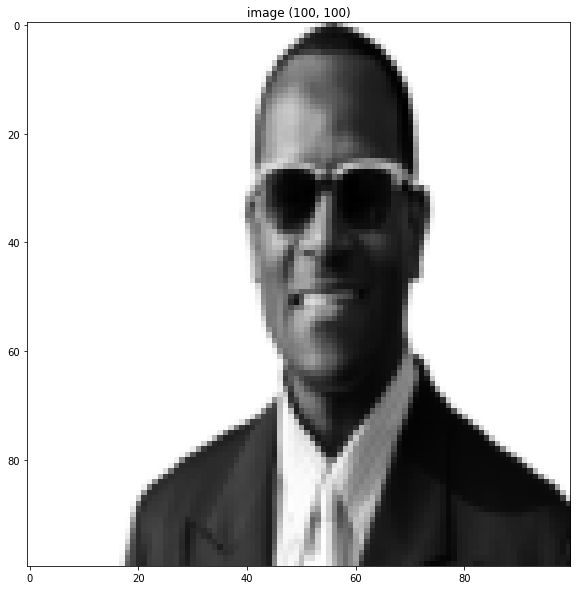

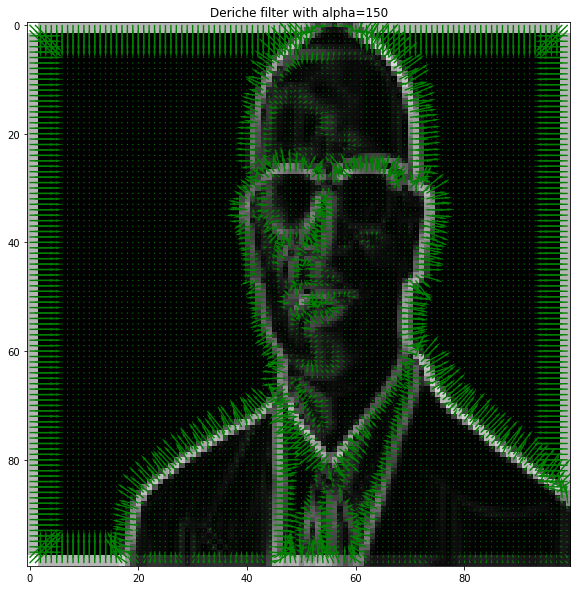

In [5]:
H = img.shape[0]
W = img.shape[1]

def dericheFilterX(img, alpha):
  # Apply Deriche filter to each lines of the image
  L = img.shape[0]
  C = img.shape[1]
  expAlpha = math.exp(-alpha)
  c = -((1-expAlpha)**2) / expAlpha
  # The result of every lines
  B = np.zeros((L, C))

  for line in range(L):
    # For each line
    B1 = np.zeros(C)
    B2 = np.zeros(C)
    for col in range(2, C):
      B1[col] = img[line, col-1] + 2*expAlpha*B1[col-1] - (expAlpha**2)*B1[col-2]
    for col in range(C-3, -1, -1):
      B2[col] = img[line, col+1] + 2*expAlpha*B2[col+1] + (expAlpha**2)*B2[col+2]
    B[line,:] = c*expAlpha*(B1-B2)
  return B

def dericheFilterY(img, alpha):
  # Apply Deriche filter to each columns of the image
  L = img.shape[0]
  C = img.shape[1]
  expAlpha = math.exp(-alpha)
  c = -((1-expAlpha)**2) / expAlpha
  # The result of every columns
  B = np.zeros((L, C))

  for col in range(C):
    # For each column
    B1 = np.zeros(L)
    B2 = np.zeros(L)
    for line in range(2, L):
      B1[line] = img[line-1, col] + 2*expAlpha*B1[line-1] - (expAlpha**2)*B1[line-2]
    for line in range(L-3, -1, -1):
      B2[line] = img[line+1, col] + 2*expAlpha*B2[line+1] + (expAlpha**2)*B2[line+2]
    B[:,col] = c*expAlpha*(B1-B2)
  return B

alpha = 150
img_deriche_x = dericheFilterX(img, alpha)
img_deriche_y = dericheFilterY(img, alpha)
img_deriche_norm = np.sqrt(img_deriche_x**2 + img_deriche_y**2)

plt.figure(figsize=(10,10))
plt.title(f"image {img.shape}")
plt.imshow(img, cmap='gray')

fig, axi = plt.subplots(1,1, figsize=(10,10))
axi.set_title(f"Deriche filter with alpha={alpha}")
axi.imshow(img_deriche_norm, cmap='gray')
gridY,gridX = np.mgrid[0:H,0:W]
axi.quiver(gridX, gridY, img_deriche_x*5, img_deriche_y*5, color='g',
  angles='xy', scale_units='xy', scale=1, width=0.0025, headwidth=2)
plt.show()


# Edge detection using the laplacian



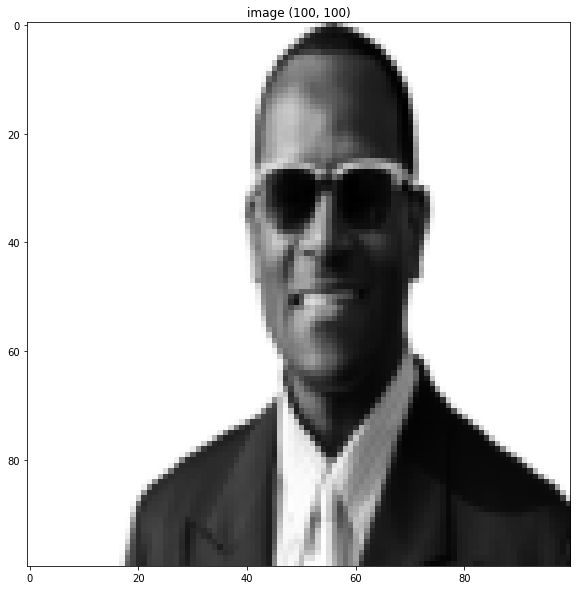

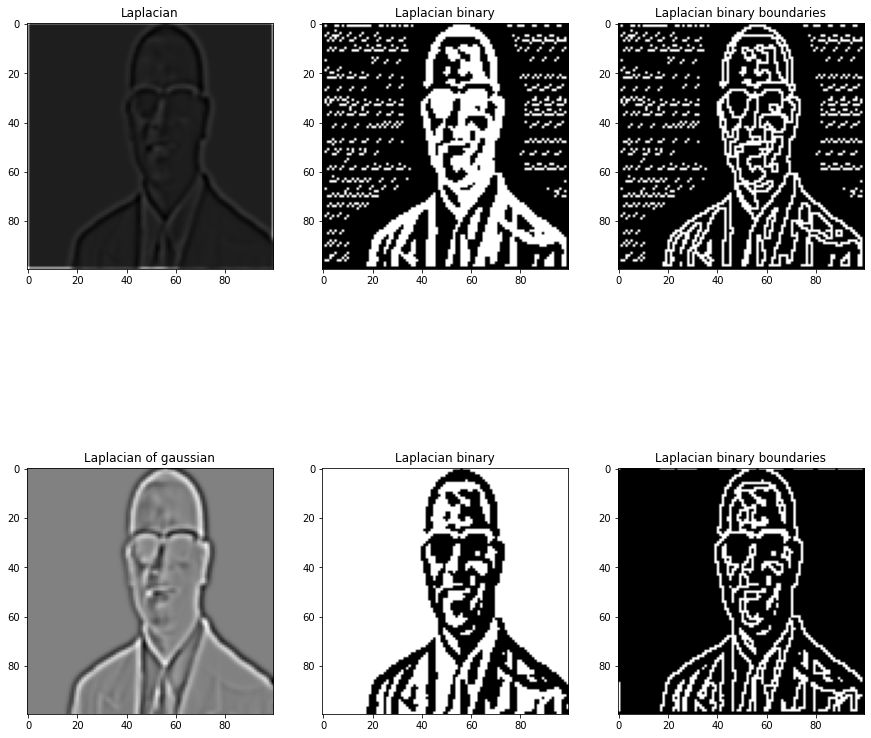

In [6]:
H = img.shape[0]
W = img.shape[1]

def get_boundary(img):
  # img is a bynary image
  res = np.zeros(img.shape)
  for l in range(0, img.shape[0]-1):
    for c in range(0, img.shape[1]-1):
      if img[l,c]==1:
        is_boundary = False
        for i in range(-1,2,1):
          for j in range(-1,2,1):
            if img[l+i,c+j]==0:
              is_boundary = True
        if is_boundary:
          res[l,c] = 1
  return res  

sigma = 1

# Gaussian filtering
img_gaussian = ndimage.gaussian_filter(img, sigma)
# Laplacian filtering
kernel_laplacian = np.array([
  [0,   -1,   0],
  [-1,  4,    -1],
  [0,   -1,   0]
])
img_laplacian = signal.convolve2d(img_gaussian, kernel_laplacian, mode='same')
img_laplacian_binary = np.int32(img_laplacian < 0)
img_laplacian_binary_boundary = get_boundary(img_laplacian_binary)

# With Scikit implementation
img_gaussian_laplacian = ndimage.gaussian_laplace(img, sigma)
img_gaussian_laplacian_binary = np.int32(img_gaussian_laplacian < 0)
img_gaussian_laplacian_binary_boundary = get_boundary(img_gaussian_laplacian_binary)

plt.figure(figsize=(10,10))
plt.title(f"image {img.shape}")
plt.imshow(img, cmap='gray')

fig, axisarray = plt.subplots(2, 3, figsize=(15,15))
# Laplacian
axisarray[0,0].set_title('Laplacian')
axisarray[0,0].imshow(img_laplacian, cmap='gray')
# Binary
axisarray[0,1].set_title('Laplacian binary')
axisarray[0,1].imshow(img_laplacian_binary, cmap='gray')
# Boundaries
axisarray[0,2].set_title('Laplacian binary boundaries')
axisarray[0,2].imshow(img_laplacian_binary_boundary, cmap='gray')

# Laplacian of gaussian
axisarray[1,0].set_title('Laplacian of gaussian')
axisarray[1,0].imshow(img_gaussian_laplacian, cmap='gray')
# Binary
axisarray[1,1].set_title('Laplacian binary')
axisarray[1,1].imshow(img_gaussian_laplacian_binary, cmap='gray')
# Boundaries
axisarray[1,2].set_title('Laplacian binary boundaries')
axisarray[1,2].imshow(img_gaussian_laplacian_binary_boundary, cmap='gray')


# Edge detection by morphological operations